
Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "First 6 rows of the mtcars dataset:"


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


[1] "Structure of the mtcars dataset:"
'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...
[1] "Dimensions of mtcars (observations, variables):"


[1] 32 11

Missing values after scaling:
 mpg  cyl disp   hp drat   wt qsec   vs   am gear carb 
   0    0    0    0    0    0    0    0    0    0    0 


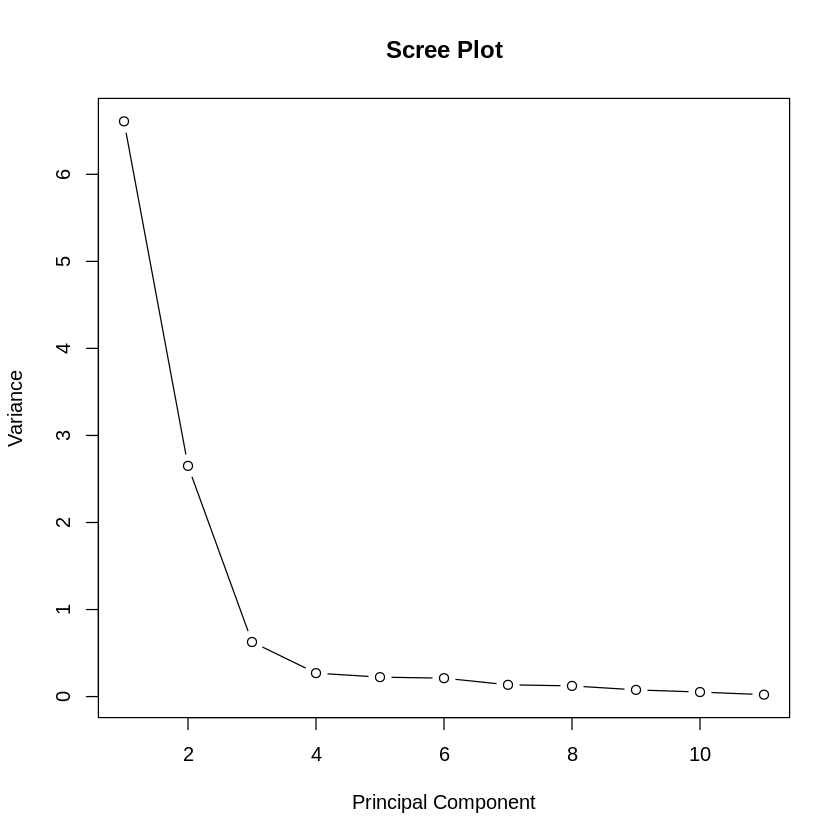

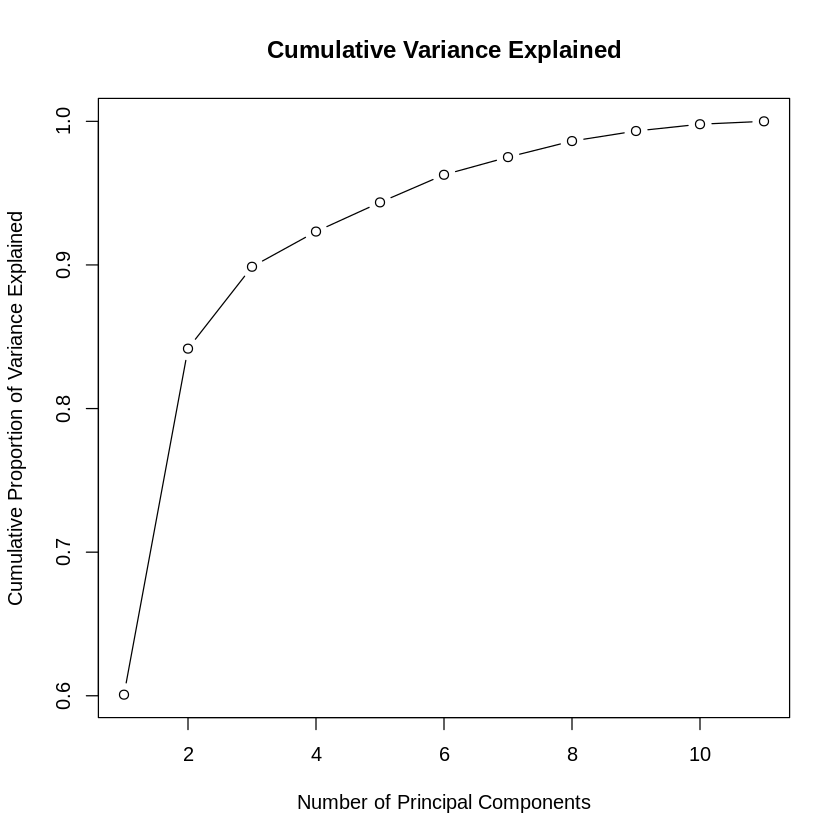

[1] "Goodness of Fit (GOF) statistics from cmdscale:"
[1] 0.8417153 0.8417153


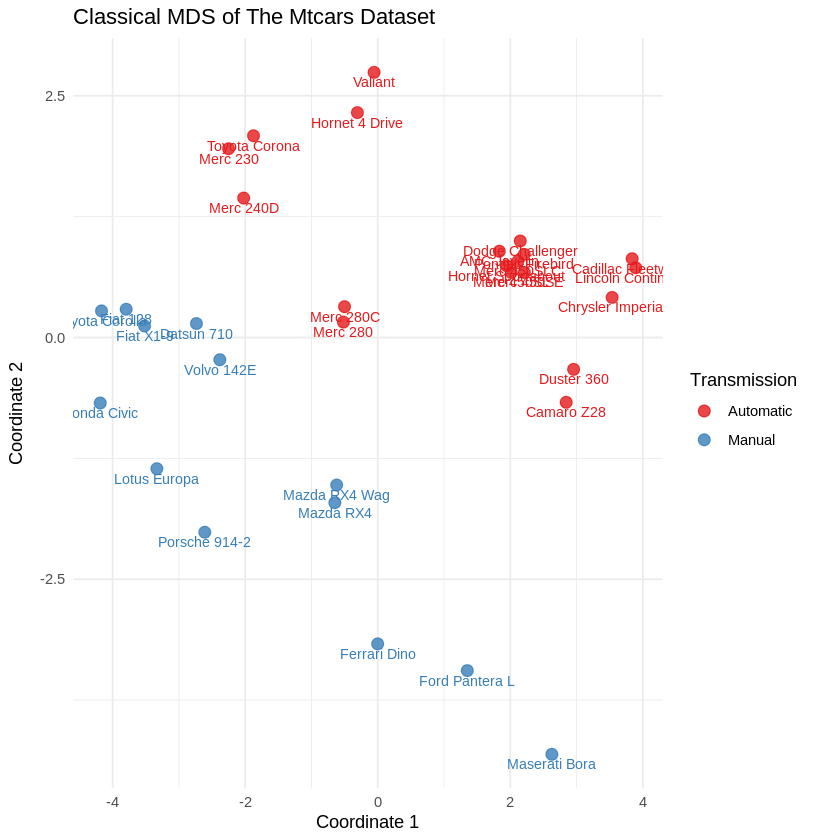

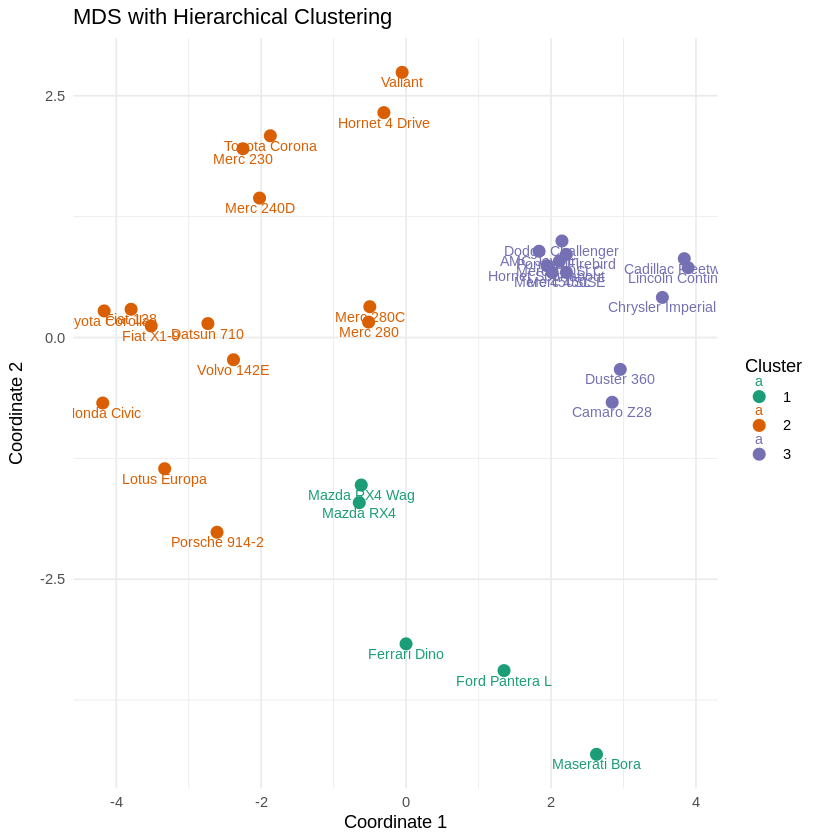

In [1]:
# Load libraries
library(ggplot2)
library(dplyr)

# Load the mtcars dataset
data(mtcars)

# Basic data inspection
print("First 6 rows of the mtcars dataset:")
head(mtcars)

print("Structure of the mtcars dataset:")
str(mtcars)

print("Dimensions of mtcars (observations, variables):")
dim(mtcars)

# Data Preprocessing: Scale the numeric data
mtcars_scaled <- scale(mtcars)

# Check for missing values
cat("Missing values after scaling:\n")
print(colSums(is.na(mtcars_scaled)))

# --- PCA Section ---
pca_results <- prcomp(mtcars_scaled)

# Eigenvalues and variance explained
eigenvalues <- pca_results$sdev^2
proportion_variance_explained <- eigenvalues / sum(eigenvalues)

# Scree plot
plot(eigenvalues, xlab = "Principal Component",
     ylab = "Variance", type = "b",
     main = "Scree Plot")

# Cumulative proportion of variance explained
plot(cumsum(proportion_variance_explained), xlab = "Number of Principal Components",
     ylab = "Cumulative Proportion of Variance Explained", type = "b",
     main = "Cumulative Variance Explained")

# --- Classical MDS Section ---
distance_matrix <- dist(mtcars_scaled, method = "euclidean")
mds_results <- cmdscale(distance_matrix, k = 2, eig = TRUE)
mds_points <- mds_results$points

# Prepare metadata for plotting
mtcars$car_name <- rownames(mtcars)
mtcars$cyl <- factor(mtcars$cyl)
mtcars$am <- factor(mtcars$am, labels = c("Automatic", "Manual"))

mds_df <- data.frame(
  Dim1 = mds_points[, 1],
  Dim2 = mds_points[, 2],
  Car = mtcars$car_name,
  Transmission = mtcars$am,
  Cylinders = mtcars$cyl
)

# Visualize MDS
ggplot(mds_df, aes(x = Dim1, y = Dim2, color = Transmission, label = Car)) +
  geom_point(size = 3, alpha = 0.8) +
  geom_text(vjust = 1.5, size = 3, show.legend = FALSE) +
  labs(title = "Classical MDS of The Mtcars Dataset",
       x = "Coordinate 1", y = "Coordinate 2") +
  theme_minimal() +
  scale_color_brewer(palette = "Set1")

# Goodness of Fit statistics
print("Goodness of Fit (GOF) statistics from cmdscale:")
print(mds_results$GOF)

# --- Bonus: Hierarchical Clustering Overlay (optional) ---
# Perform clustering on the same distance matrix
hc <- hclust(distance_matrix)
clusters <- cutree(hc, k = 3)
mds_df$Cluster <- as.factor(clusters)

# Visualize MDS with clusters
ggplot(mds_df, aes(x = Dim1, y = Dim2, color = Cluster, label = Car)) +
  geom_point(size = 3) +
  geom_text(vjust = 1.5, size = 3) +
  labs(title = "MDS with Hierarchical Clustering",
       x = "Coordinate 1", y = "Coordinate 2") +
  theme_minimal() +
  scale_color_brewer(palette = "Dark2")
